<a href="https://colab.research.google.com/github/vanecornejo/Investigacion-de-operaciones/blob/main/Proyecto_PERT_CPM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **Proyecto: Viaje a Italia — PERT / CPM**

Castellanos Sánchez Omar

Martinez Cornejo Vanessa

--------------------------------
La **ruta crítica** es una técnica utilizada en la administración de proyectos para planificar, programar y controlar las actividades necesarias para alcanzar un objetivo dentro de un tiempo determinado. Se centra en identificar la secuencia de tareas que determina la duración total del proyecto, es decir, aquellas actividades que no pueden retrasarse sin que se retrase también la fecha final del proyecto.

En este proyecto se listan las actividades principales para la planeación de un viaje a Italia. Se incluye todas las actividades necesarias, desde decidir el destino hasta la fecha de salida.  

La tabla de actividades:

|Código|Actividad|Predecesores|Duración (días)|
|------|----------|-------------|---------------|
|A|Decidir destino|—|2|
|B|Pasaporte/visa|A|10|
|C|Reservar vuelos|A, B|3|
|D|Reservar hotel|A|6|
|E|Seguro de viaje|C, D|2|
|F|Vestimenta/equipaje|A|4|
|G|Empacar y preparativos finales|E, F|3|
|H|Día de salida|G|1|


El grafo que nos muestra la red del proyecto de viaje a Italia:

In [114]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

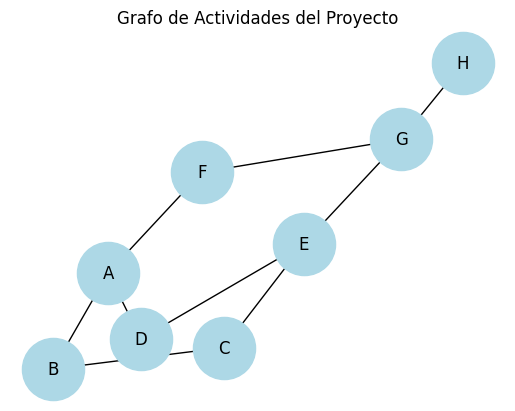

In [115]:
# Grafo dirigido
G = nx.DiGraph()

# Agregar nodos
for index, row in df.iterrows():
    G.add_node(row['Actividad'], duracion=row['Tiempo_normal'])


# Definir predecesores
predecesores = {
    'A': [],
    'B': ['A'],
    'C': ['B'],
    'D': ['A'],
    'E': ['C','D'],
    'F': ['A'],
    'G': ['E','F'],
    'H': ['G']
}

# Agregar aristas
for act, preds in predecesores.items():
    for p in preds:
        G.add_edge(p, act)

# Posiciones automáticas
pos = nx.spring_layout(G)

# Nodos y aristas
nx.draw_networkx_nodes(G, pos, node_color='lightblue', node_size=2000)
nx.draw_networkx_edges(G, pos, arrowstyle='->', arrowsize=20)

nx.draw_networkx_labels(G, pos, font_size=12)

# Mostrar grafo
plt.title("Grafo de Actividades del Proyecto")
plt.axis('off')
plt.show()

La tabla de costos (en pesos mexicanos):

In [116]:
costos = [
    ('A','Decidir destino', 2,1,0,0,0),
    ('B','Pasaporte / visa',10,5,2500,4000,300),
    ('C','Reservar vuelos',3,1,16000,19000,1500),
    ('D','Reservar hotel',6,1,12000,13000,1000),
    ('E','Seguro de viaje',2,1,1000,1400,200),
    ('F','Vestimenta / equipaje',4,2,4000,4600,300),
    ('G','Empacar / preparativos',3,2,0,500,250),
    ('H','Salida',1,1,0,0,0),
]

df = pd.DataFrame(costos, columns=['Actividad','Descripción','Tiempo_normal','Tiempo_minimo','Costo_normal','Costo_minimo','Costo_por_dia_reducido'])
df


,Actividad,Descripción,Tiempo_normal,Tiempo_minimo,Costo_normal,Costo_minimo,Costo_por_dia_reducido
0,A,Decidir destino,2,1,0,0,0
1,B,Pasaporte / visa,10,5,2500,4000,300
2,C,Reservar vuelos,3,1,16000,19000,1500
3,D,Reservar hotel,6,1,12000,13000,1000
4,E,Seguro de viaje,2,1,1000,1400,200
5,F,Vestimenta / equipaje,4,2,4000,4600,300
6,G,Empacar / preparativos,3,2,0,500,250
7,H,Salida,1,1,0,0,0


In [117]:
# Ruta crítica
ruta_critica = nx.dag_longest_path(G, weight='duracion')
duracion_total_normal = sum(G.nodes[n]['duracion'] for n in ruta_critica)

print("Ruta crítica:", " → ".join(ruta_critica))
print("Duración total normal (días):", duracion_total_normal)

Ruta crítica: A → B → C → E → G → H
Duración total normal (días): 21


La tabla final con el tiempo y costo total del proyecto

In [118]:
# Filtrar actividades en la ruta crítica
df_cp = df[df['Actividad'].isin(ruta_critica)].copy()

# Calcular reducción de días por actividad
df_cp['Reduccion_dias'] = df_cp['Tiempo_normal'] - df_cp['Tiempo_minimo']

# Costo de reducción por actividad
df_cp['Costo_reduccion'] = df_cp['Reduccion_dias'] * df_cp['Costo_por_dia_reducido']

# Duración mínima de la ruta crítica
duracion_minima = df_cp['Tiempo_minimo'].sum()

# Costo total minimizado
costo_minimizado = df_cp['Costo_normal'].sum() + df_cp['Costo_reduccion'].sum()

resumen = pd.DataFrame({
    'Duración total del proyecto (días)': [duracion_total_normal],
    'Duración final después de minimizar (días)': [duracion_minima],
    'Reducción (días)': [duracion_total_normal - duracion_minima],
    'Costo total minimizado (MXN)': [costo_minimizado]
})
resumen

,Duración total del proyecto (días),Duración final después de minimizar (días),Reducción (días),Costo total minimizado (MXN)
0,21,11,10,24450


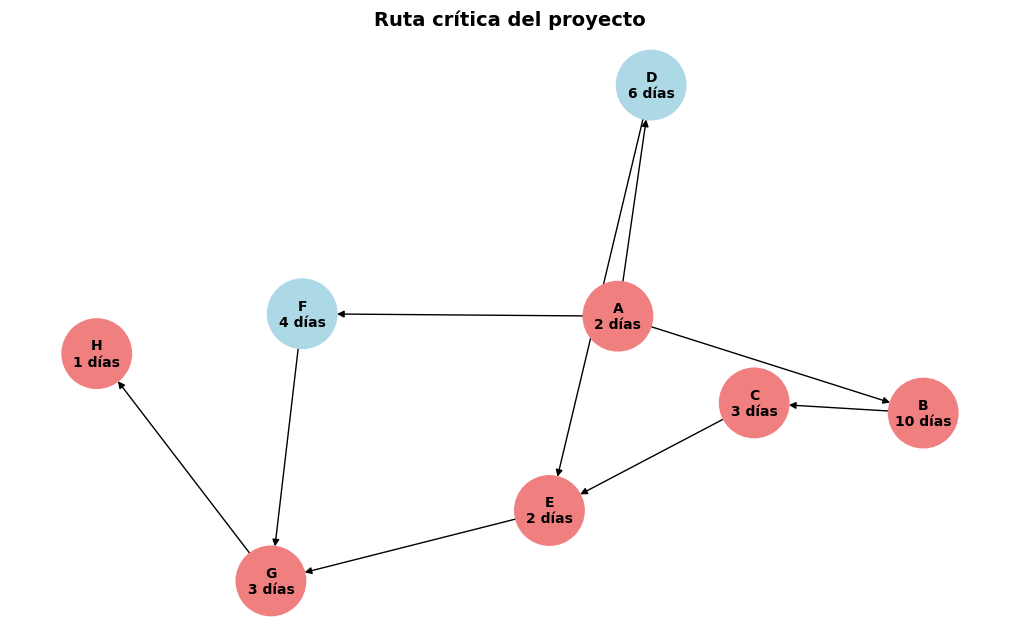

In [119]:
# Posiciones de los nodos
pos = nx.spring_layout(G, seed=42)

# Etiquetas con duración
labels = {n: f"{n}\n{G.nodes[n]['duracion']} días" for n in G.nodes()}

# Colorear la ruta crítica en rojo, las demás actividades en azul
colores = ["lightcoral" if n in ruta_critica else "lightblue" for n in G.nodes()]

# Dibujar el grafo
plt.figure(figsize=(10,6))
nx.draw(
    G, pos,
    with_labels=True, labels=labels,
    node_size=2500, node_color=colores,
    font_size=10, font_weight="bold", arrows=True
)

plt.title("Ruta crítica del proyecto", fontsize=14, fontweight="bold")
plt.show()

## Ruta Crítica

De acuerdo con el análisis, la **ruta crítica** del proyecto del viaje a Italia es:  

**A → B → C → E → G → H**  

La ruta critica es la secuencia de actividades más larga (en tiempo) del proyecto.